In [3]:
import pymysql
import pandas as pd
import numpy as np

#Connect to MySQL database

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                              host='masscourtsplus.org',
                              database='wp_courtdocs')


cursor = cnx.cursor()
# more info here: https://docs.google.com/document/d/1aZKF0X7HjcXUYurD8uQYDpgo9wQdeJH4CMviBJeTYVc/edit#

In [16]:
query = """
SELECT
    case_number,
    case_type,
    case_status,
    CASE 
        WHEN post_title = 'Pro Se (PROPER)' THEN 'Pro Se'
        ELSE post_title
    END AS attorney
FROM
    cdocs_case_meta_index AS cdocs_meta
        JOIN
    wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id
        JOIN
    wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
        JOIN
    wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent
        JOIN
    cdocs_party_assignment_index party_aidx ON party_aidx.case_id = cdocs_meta.post_id
            JOIN
    wp_posts ON wp_posts.id = party_aidx.attorney_id
            JOIN
    cdocs_case_action_index action_idx ON action_idx.case_id = party_aidx.case_id
WHERE
    case_status LIKE '%Open%'
    AND action_idx.description LIKE '%debt%'
"""

%time

cursor.execute(query)
results = cursor.fetchall()


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [22]:
open_ps_pp = pd.DataFrame(results)


,Case Number,Case Type,Case Status,Attorney
0,13H79SP004655,Housing Court Summary Process,Reopened,"Pearson, John E"
1,13H79SP004655,Housing Court Summary Process,Reopened,Pro Se
2,13H79SP004655,Housing Court Summary Process,Reopened,Pro Se
3,14H79SP004781,Housing Court Summary Process,Reopened,"Brown, Richard Michael"
4,14H79SP004781,Housing Court Summary Process,Reopened,"Jelescheff, Scott"
...,...,...,...,...
36989,2466CV000078,Civil,Open,"Wasson, Nicholas"
36990,2466CV000078,Civil,Open,"Wasson, Nicholas"
36991,2466CV000078,Civil,Open,"Wasson, Nicholas"
36992,2422CV000083,Civil,Open,"Wasson, Nicholas"


In [31]:
unique_case_numbers = open_ps_pp['Case Number'].nunique()

print("Number of unique Case Numbers:", unique_case_numbers)

Number of unique Case Numbers: 13252


In [23]:
import pandas as pd


open_ps_pp = pd.DataFrame(results)

# Rename the columns 
open_ps_pp = open_ps_pp.rename({0:'Case Number', 1:'Case Type', 2:'Case Status', 3:'Attorney'}, axis=1)

# Count the occurrences of each unique value in the 'Attorney' column
attorney_counts = open_ps_pp['Attorney'].value_counts()

print(attorney_counts)


Attorney
Reczek, Erin M             3920
Smith, Matthew D           3485
Boudreau, Richard J        3327
Patterson, Sandra Lisa     2954
Girard, Lynnette           2528
                           ... 
Jones, Ainsworth O'Neil       1
Knapik, Walter Robert         1
Reisman, Kenneth Paul         1
Lanza, Mark J                 1
Lynn, Michael                 1
Name: count, Length: 1429, dtype: int64


In [25]:
# Filter attorney_counts to include only names starting with 'P'
attorney_counts_starts_with_p = attorney_counts[attorney_counts.index.str.startswith('P')]
print(attorney_counts_starts_with_p)


Attorney
Patterson, Sandra Lisa    2954
Pro Se                    1575
Pratt, Randall L           783
Paro, Gina Marie           526
Patten, Audrey              10
                          ... 
Pitnof, Nathaniel D          1
Phelan, William J            1
Pastore, Michael E.          1
Pease, Cameron C             1
Posner, Bernard D.           1
Name: count, Length: 74, dtype: int64


In [30]:
pro_se_cases = open_ps_pp[open_ps_pp['Attorney'] == 'Pro Se']
pro_se_cases


,Case Number,Case Type,Case Status,Attorney
1,13H79SP004655,Housing Court Summary Process,Reopened,Pro Se
2,13H79SP004655,Housing Court Summary Process,Reopened,Pro Se
6,10H79SP000501,Housing Court Summary Process,Reopened,Pro Se
7,10H79SP000501,Housing Court Summary Process,Reopened,Pro Se
8,10H79SP000501,Housing Court Summary Process,Reopened,Pro Se
...,...,...,...,...
35513,2402CV000052EF,Civil,Open,Pro Se
35515,2402CV000052EF,Civil,Open,Pro Se
36743,2459CV000197,Civil,Open,Pro Se
36745,2459CV000197,Civil,Open,Pro Se


In [59]:
unique_case_numbers = open_ps_pp['Case Number'].nunique()
unique_Prose_ = pro_se_cases['Case Number'].nunique()

print("Number of unique Case Numbers:", unique_case_numbers)
print("Number of unique Pro Case Numbers:", unique_Prose_)



Number of unique Case Numbers: 13252
Number of unique Pro Case Numbers: 607


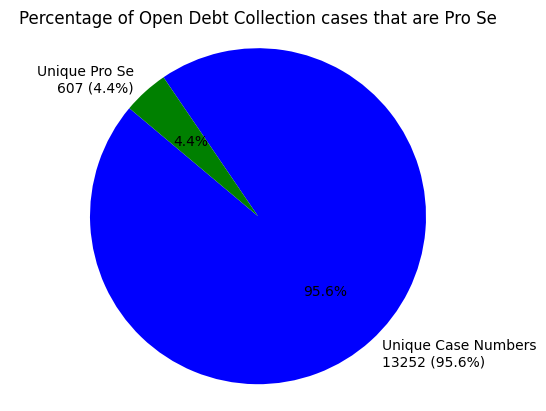

In [61]:
import matplotlib.pyplot as plt



# Calculate the total number of cases
total_cases = unique_case_numbers + unique_Prose_

# Create labels for the pie chart
labels = ['Unique Case Numbers\n{} ({:.1f}%)'.format(unique_case_numbers, unique_case_numbers / total_cases * 100),
          'Unique Pro Se\n{} ({:.1f}%)'.format(unique_Prose_, unique_Prose_ / total_cases * 100)]

# Create sizes for the pie chart
sizes = [unique_case_numbers, unique_Prose_]

# Define colors
colors = ['blue', 'green']

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Percentage of Open Debt Collection cases that are Pro Se')

# Show the pie chart
plt.show()


In [45]:
query = """
SELECT
    case_number,
    case_type,
    case_status,
    CASE 
        WHEN post_title = 'Pro Se (PROPER)' THEN 'Pro Se'
        ELSE post_title
    END AS attorney
FROM
    cdocs_case_meta_index AS cdocs_meta
        JOIN
    wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id
        JOIN
    wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
        JOIN
    wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent
        JOIN
    cdocs_party_assignment_index party_aidx ON party_aidx.case_id = cdocs_meta.post_id
            JOIN
    wp_posts ON wp_posts.id = party_aidx.attorney_id
            JOIN
    cdocs_case_action_index action_idx ON action_idx.case_id = party_aidx.case_id
WHERE
    case_status LIKE '%Open%'
    AND action_idx.description LIKE '%debt%'
    AND action_idx.description LIKE '%default%'
"""

%time

cursor.execute(query)
results = cursor.fetchall()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [48]:
default_cases=pd.DataFrame(results).rename({0:'Case Number', 1:'Case Type', 2:'Case Status', 3:'Attorney'}, axis=1)
default_cases['Case Number'].nunique()


185

In [64]:
import pandas as pd

unique_default_cases = default_cases['Case Number'].unique()

# Filter the DataFrame to include only rows with unique case numbers
unique_cases_deftault = default_cases[default_cases['Case Number'].isin(unique_default_cases)]
unique_cases_deftault



,Case Number,Case Type,Case Status,Attorney
0,1081CV02496,Real Property,Open,"Driscoll, Christopher Shaun Mo"
1,1385CV00471,Contract / Business Cases,Open,"Domestico, Vincent"
2,1081CV03301,Real Property,Open,"Shaughnessy, Erik"
3,1181CV04424,Torts,Open,"Breakstone, Marc Lawrence"
4,1181CV04424,Torts,Open,"Buell, Barbara Hayes"
...,...,...,...,...
273,2331SC150113,Small Claims,Open,"Brugnoli, III, Carl A"
274,2331SP000014,Supplementary Process,Open,"Ford, Michael William"
275,2331SP000014,Supplementary Process,Open,"Ford, Michael William"
276,2431SC000209,Small Claims,Open,"Brugnoli, III, Carl A"


In [71]:
# Open Pro Se cases that go into Default
unique_cases_deftault[unique_cases_deftault['Attorney'] == 'Pro Se']

,Case Number,Case Type,Case Status,Attorney
91,1673CV00182,Contract / Business Cases,Open,Pro Se
199,1572CV00491,Contract / Business Cases,Open,Pro Se


In [118]:
query = """
SELECT
    case_number,
    case_type,
    case_status,
    post_title AS attorney
FROM
    cdocs_case_meta_index AS cdocs_meta
        JOIN
    wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id
        JOIN
    wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
        JOIN
    wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent
		JOIN
    cdocs_party_assignment_index party_aidx ON party_aidx.case_id = cdocs_meta.post_id
    		JOIN
    wp_posts ON wp_posts.id = party_aidx.attorney_id
    		JOIN
    cdocs_case_action_index action_idx ON action_idx.case_id = party_aidx.case_id
WHERE
    (post_title = 'Pro Se' OR post_title = 'Pro Se (PROPER)')
    AND action_idx.description LIKE '%debt%'
;

"""

%time

cursor.execute(query)
results = cursor.fetchall()


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [122]:

All_Prose = pd.DataFrame(results).rename({0:'Case Number', 1:'Case Type', 2:'Case Status', 3:'Attorney'}, axis=1)

# Get unique case numbers
unique_case_numbers = All_Prose['Case Number'].unique()

# Filter the DataFrame to include only rows with unique case numbers
unique_cases_prose = All_Prose[All_Prose['Case Number'].isin(unique_case_numbers)]

unique_cases_prose



,Case Number,Case Type,Case Status,Attorney
0,10H83SP02795FR,Housing Court Summary Process,Active,Pro Se
1,10H83SP02795FR,Housing Court Summary Process,Active,Pro Se
2,15H83SP03940NB,Housing Court Summary Process,Active,Pro Se
3,15H83SP03929TA,Housing Court Summary Process,Active,Pro Se
4,15H83SP03929TA,Housing Court Summary Process,Active,Pro Se
...,...,...,...,...
404842,15H84SP003549,Housing Court Summary Process,Closed,Pro Se (PROPER)
404843,15H84SP003549,Housing Court Summary Process,Closed,Pro Se (PROPER)
404844,08H84SP003879,Housing Court Summary Process,Closed,Pro Se (PROPER)
404845,08H84SP003879,Housing Court Summary Process,Closed,Pro Se (PROPER)


In [124]:
unique_case_numbers_prose = unique_cases_prose['Case Number'].nunique()
print("Total Pro Se Debt Collection Cases:", unique_case_numbers_prose)

Total Pro Se Debt Collection Cases: 145102


In [86]:
query = """
SELECT
    case_number,
    case_type,
    case_status,
    CASE 
        WHEN post_title = 'Pro Se (PROPER)' THEN 'Pro Se'
        ELSE post_title
    END AS attorney
FROM
    cdocs_case_meta_index AS cdocs_meta
        JOIN
    wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id
        JOIN
    wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
        JOIN
    wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent
        JOIN
    cdocs_party_assignment_index party_aidx ON party_aidx.case_id = cdocs_meta.post_id
            JOIN
    wp_posts ON wp_posts.id = party_aidx.attorney_id
            JOIN
    cdocs_case_action_index action_idx ON action_idx.case_id = party_aidx.case_id
WHERE
    action_idx.description LIKE '%debt%'
    AND action_idx.description LIKE '%default%'
"""

%time

cursor.execute(query)
results = cursor.fetchall()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


In [87]:
# ALL Cases that go into Default
default_cases=pd.DataFrame(results).rename({0:'Case Number', 1:'Case Type', 2:'Case Status', 3:'Attorney'}, axis=1)
default_cases['Case Number'].nunique()

133683

In [111]:
unique_default_cases
unique_default_cases = default_cases['Case Number'].unique()

# Filter the DataFrame to include only rows with unique case numbers
unique_cases_deftault = default_cases[default_cases['Case Number'].isin(unique_default_cases)]
unique_cases_deftault


,Case Number,Case Type,Case Status,Attorney
0,1007SP000837,Supplementary Process,Disposed (Statistical Purposes),"Cambece, James Anthony"
1,1007SP000836,Supplementary Process,Disposed (Statistical Purposes),"Cambece, James Anthony"
2,1007SP000834,Supplementary Process,Disposed (Statistical Purposes),"Cambece, James Anthony"
3,1007SP000833,Supplementary Process,Disposed (Statistical Purposes),"Cambece, James Anthony"
4,1107SP000304,Supplementary Process,Disposed (Statistical Purposes),"Rosen, Michael B"
...,...,...,...,...
212710,2365SP000003,Supplementary Process,Open,"Fumudoh, Jr., David M"
212711,22H77SP005027,Housing Court Summary Process,Active,"Levine, Jason L"
212712,22H77SP005027,Housing Court Summary Process,Active,Pro Se
212713,2431SC000209,Small Claims,Open,"Brugnoli, III, Carl A"


In [127]:
pro_se_cases = unique_cases_deftault[unique_cases_deftault['Attorney'] == 'Pro Se']
default_prose_all=pro_se_cases['Case Number'].nunique()
default_prose_all

28

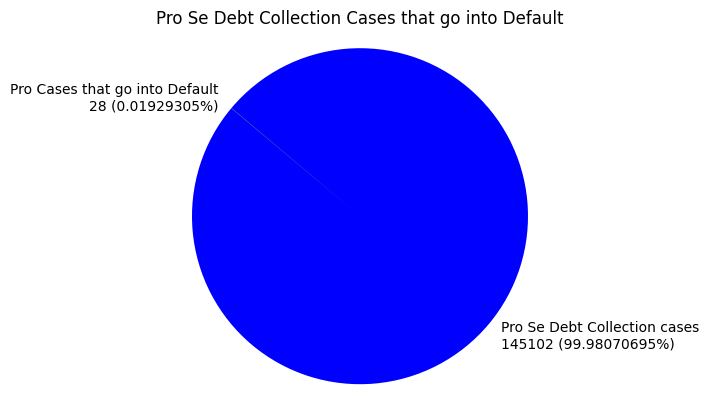

In [139]:


# Calculate the percentages
percentage_prose = (total_unique_cases / (total_unique_cases + default_prose_all)) * 100
percentage_default = (default_prose_all / (total_unique_cases + default_prose_all)) * 100

# Create labels for the pie chart with counts and percentages
labels = [
    f'Pro Se Debt Collection cases\n{total_unique_cases} ({percentage_prose:.8f}%)' if percentage_prose > 0 else f'Pro Se Debt Collection cases\n{total_unique_cases} (0.00000000%)',
    f'Pro Cases that go into Default\n{default_prose_all} ({percentage_default:.8f}%)' if percentage_default > 0 else f'Pro Cases that go into Default\n{default_prose_all} (0.00000000%)'
]

# Create sizes for the pie chart
sizes = [total_unique_cases, default_prose_all]

# Define colors
colors = ['blue', 'green']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Pro Se Debt Collection Cases that go into Default')

# Show the pie chart
plt.show()


In [141]:
query = """
SELECT
    case_number,
    case_type,
    case_status,
    post_title AS attorney
FROM
    cdocs_case_meta_index AS cdocs_meta
        JOIN
    wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id
        JOIN
    wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
        JOIN
    wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent
		JOIN
    cdocs_party_assignment_index party_aidx ON party_aidx.case_id = cdocs_meta.post_id
    		JOIN
    wp_posts ON wp_posts.id = party_aidx.attorney_id
    		JOIN
    cdocs_case_action_index action_idx ON action_idx.case_id = party_aidx.case_id
WHERE
    action_idx.description LIKE '%debt%'
;

"""

%time

cursor.execute(query)
results = cursor.fetchall()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8df5a09c-22d6-4edb-b49b-1a2367b8b2ae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>